# Waves in Cold Magnetized Plasma (Part 2)

In [316]:
import plasmapy as pp
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c

## Summary of the Previous Lecture
* 2 main classes of models are available to describe the plasma response to the wave field: *fluid* models and *kinetic* models
* *Cold plasmas* are described by setting the temperature/pressure to 0 in the fluid equations
    * This allows the Stix dielectric tensor for cold plasmas to be computed
    * (it can also be done in the framework of the kinetic theory.) 
* The wave equation and *dispersion relation* reveal 2 waves (or *modes*)
    * each either propagative ($k^2 > 0$) or evanescent ($k^2 < 0$)

### Formulary
#### Fluid Density Conservation
$$
\frac{\partial n_s}{\partial t} + \nabla \cdot (n_s \underline{V_s}) = 0
$$

#### Fluid Momentum Conservation
$$
n_s m_s \left(
\frac{\partial \underline{V_s}}{\partial t} + (\underline{V}_s\cdot\nabla)\underline{V_s}
\right)
=
n_s q_s (\underline{E} + \underline{V_s} \times \underline{B})
- \nabla \cdot \underline{\underline{\Phi_s}}
$$

#### Wave Equation and Dispersion Relation
$$
\underline{\underline{M}} \cdot \underline{E} = \underline{0}
$$
with 
$$
\underline{\underline{M}} = k^2 \underline{\underline{I}} - \frac{\omega^2}{c^2} \underline{\underline{K}} - \underline{k}\underline{k}
$$
The non trivial solution of the previous equation is obtained for $\det\underline{\underline{M}}=0$ which can be solved for $\omega(\underline{k})$, the *dispersion relation*.


#### Cold Dielectric Tensor
$$
\underline{\underline{\varepsilon}} 
= \varepsilon_0 \underline{\underline{K}} 
= \varepsilon_0 \left(\underline{\underline{I}} + \frac{i}{\omega \varepsilon_0} \underline{\underline{\sigma}}\right) 
$$
with the traditionnal notation (*Stix tensor*):
$$
\underline{\underline{K}} 
= 
\left(
\begin{matrix}
S & -iD & 0 \\
iD & S & 0 \\
0 & 0 & P
\end{matrix}
\right)
$$
with
$$
S = \frac{1}{2}(R + L) = 1 - \sum_s \frac{\omega_{ps}^2}{\omega^2 - \Omega_{s}^2}
$$
$$
D = \frac{1}{2}(R - L) = \sum_s \frac{\omega_{ps}^2}{\omega} \frac{\Omega_s}{\omega^2 - \Omega_{s}^2}
$$
$$
P = 1 - \sum_s \frac{\omega_{ps}^2}{\omega^2}
$$
where $S$ stands for "sum", $D$ for "difference" and $P$ for "Plasma". 

* We also have:
$$
R = 1 - \sum_s \frac{\omega_{ps}^2}{\omega(\omega + \Omega_s)}
$$
$$
L = 1 - \sum_s \frac{\omega_{ps}^2}{\omega(\omega - \Omega_s)}
$$
The $R$ and $L$ terms arise in a derivation based on expressing the field in terms of rotating polarizations ("right" and "left") rather than the direct Cartesian approach (Stix frame).

* Once the dispersion relation is solved, it yields the polarization of the wave mode.

### Terminology
* *Perpendicular* or *Parallel* propagation, with respect to the confining magnetic field $\underline{B_0}$ 
* Waves are said to be:
    * *Longitudinal* if $\underline{E} \parallel \underline{k}$
    * *Transverse* if $\underline{E} \cdot \underline{k} = 0$ (i.e. $\underline{E} \perp \underline{k}$)    

## Parallel Propagation: $\underline{k}=k\underline{\hat{z}}$ ($\theta = 0$)

In [302]:
w = 2*np.pi*np.logspace(5.5, 11, 10001) * u.rad / u.s
ni = [1e18] * u.m**-3
B0 = 2 * u.T
theta = 0 * u.deg
ions = ['p']

inputs = {
    "B": B0,
    "w": w,
    "ions": ions,
    "n_i": ni,
    "theta": 0 * u.deg,
}

k =  pp.dispersion.analytical.stix(**inputs)
n_perp = (k.T /(w/c) )**2  # n^2 = (k/k0)^2

In [303]:
def filter_negative_and_positive_values(arr):
    """
    Return an array with only negative values of ``arr``
    and an array with only positive values of ``arr``.
    Each element of these arrays that does not meet the
    condition are replaced with `~numpy.nan`.
    """
    arr_neg = np.ma.masked_greater_equal(arr, 0).filled(np.nan)
    arr_pos = np.ma.masked_less_equal(arr, 0).filled(np.nan)
    return arr_neg, arr_pos

In [304]:
# filtering negative and positive n^2 for convenience plotting in loglog
n_sq_neg1, n_sq_pos1 = filter_negative_and_positive_values(n_perp[0,:])
n_sq_neg2, n_sq_pos2 = filter_negative_and_positive_values(n_perp[3,:])

In [305]:
# Some particular quantities
v_a = pp.formulary.Alfven_speed(B0, ni, 'p')
Omega_i = pp.formulary.frequencies.gyrofrequency(B0, 'p')
Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
omega_p = np.sqrt(omega_pi**2 + omega_pe**2)
omega_L = (Omega_i-Omega_e)/2 + np.sqrt(((Omega_i + Omega_e)/2)**2 + omega_p**2)
omega_R = (Omega_e-Omega_i)/2 + np.sqrt(((Omega_i + Omega_e)/2)**2 + omega_p**2)

(1000000.0, 100000000000.0)

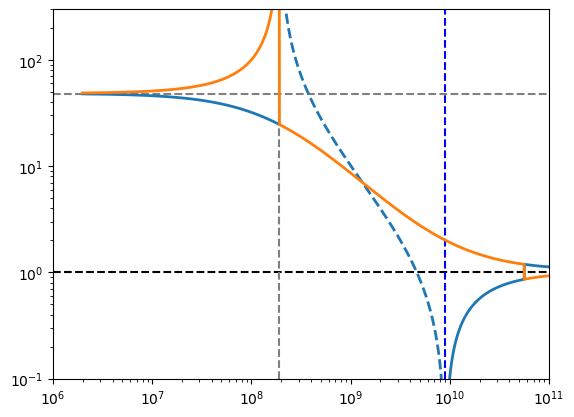

In [306]:
fig, ax = plt.subplots()
ax.axhline(1, color='k', ls='--')
ax.axhline((c/v_a.value)**2, color='gray', ls='--')
ax.axvline(Omega_i.value, color='gray', ls='--')
ax.axvline(Omega_e.value, color='gray', ls='--')
ax.axvline(omega_L.value, color='blue', ls='--')
ax.axvline(omega_R.value, color='red', ls='--')
ax.loglog(w, np.abs(n_sq_pos1), lw=2)
ax.loglog(w, np.abs(n_sq_neg1), lw=2, color='C0', ls='--')
ax.loglog(w, np.abs(n_sq_pos2), lw=2)
ax.loglog(w, np.abs(n_sq_neg2), lw=2, color='C1', ls='--')
ax.set_ylim(0.1, 300)
ax.set_xlim(1e6, 1e11)

(300000000000.0, 400000000000.0)

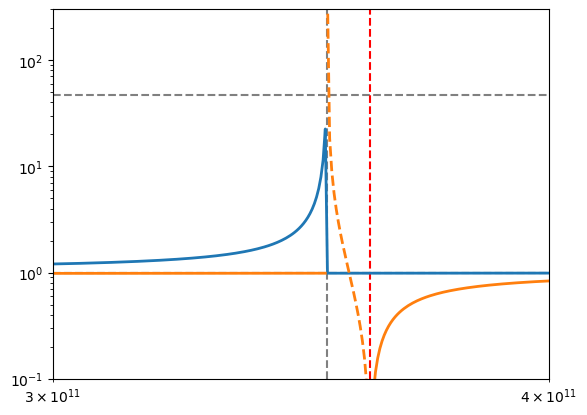

In [307]:
fig, ax = plt.subplots()
ax.axhline(1, color='k', ls='--')
ax.axhline((c/v_a.value)**2, color='gray', ls='--')
ax.axvline(Omega_i.value, color='gray', ls='--')
ax.axvline(Omega_e.value, color='gray', ls='--')
ax.axvline(omega_L.value, color='blue', ls='--')
ax.axvline(omega_R.value, color='red', ls='--')
ax.loglog(w, np.abs(n_sq_pos1), lw=2)
ax.loglog(w, np.abs(n_sq_neg1), lw=2, color='C0', ls='--')
ax.loglog(w, np.abs(n_sq_pos2), lw=2)
ax.loglog(w, np.abs(n_sq_neg2), lw=2, color='C1', ls='--')
ax.set_ylim(0.1, 300)
ax.set_xlim(3e11, 4e11)

## Perpendicular Propagation: $\underline{k}=k\underline{\hat{x}}$

In [312]:
w = 2*np.pi*np.logspace(7, 11, 10001) * u.rad / u.s
ni = [1e18] * u.m**-3
B0 = 2 * u.T
theta = 0 * u.deg
ions = ['p']

inputs = {
    "B": B0,
    "w": w,
    "ions": ions,
    "n_i": ni,
    "theta": 90 * u.deg,
}

k =  pp.dispersion.analytical.stix(**inputs)
n_perp = (k.T /(w/c) )**2  # n^2 = (k/k0)^2

In [309]:
# filtering negative and positive n^2 for convenience plotting in loglog
n_sq_neg1, n_sq_pos1 = filter_negative_and_positive_values(n_perp[0,:])
n_sq_neg2, n_sq_pos2 = filter_negative_and_positive_values(n_perp[3,:])

In [310]:
# Some particular quantities
v_a = pp.formulary.Alfven_speed(B0, ni, 'p')
Omega_i = pp.formulary.frequencies.gyrofrequency(B0, 'p')
Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
omega_p = np.sqrt(omega_pi**2 + omega_pe**2)

(0.1, 1000.0)

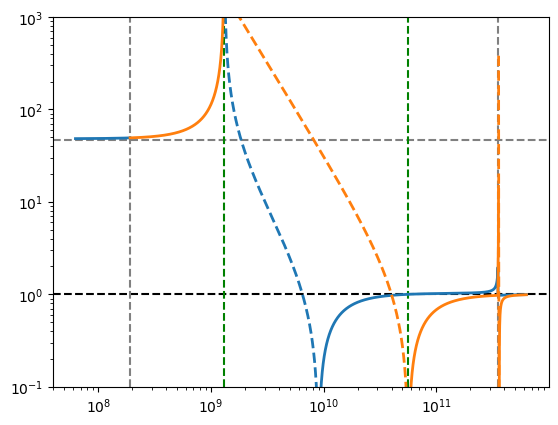

In [315]:
fig, ax = plt.subplots()
ax.axhline(1, color='k', ls='--')
ax.axhline((c/v_a.value)**2, color='gray', ls='--')
ax.axvline(Omega_i.value, color='gray', ls='--')
ax.axvline(Omega_e.value, color='gray', ls='--')
ax.axvline(omega_pi.value, color='green', ls='--')
ax.axvline(omega_pe.value, color='green', ls='--')
ax.loglog(w, np.abs(n_sq_pos1), lw=2)
ax.loglog(w, np.abs(n_sq_neg1), lw=2, color='C0', ls='--')
ax.loglog(w, np.abs(n_sq_pos2), lw=2)
ax.loglog(w, np.abs(n_sq_neg2), lw=2, color='C1', ls='--')
ax.set_ylim(bottom=0.1, top=1e3)

## Arbitrary Propagation Angle
* The case of arbitrary propagation angle with respect to the confining magnetic field direction is conceptually similar
    * always two distincts modes in a cold plasma 
    * but more difficult to treat analytically.
* When the propagation angle varies from perpendicular to parallel:
    * X-mode transforms in one of the two whistler modes
    * and O-mode becomes the other whistler
* In some particular cases, however, an analytical treatment is possible

### Intermediate range of frequencies
When 
$$ \Omega_i, \omega_{pi} \ll \omega \ll |\Omega_e|, \omega_{pe} $$
Using $n_\perp^2 = n^2 - n_\parallel^2$, the two solutions of the dispersion relation can be written approximatively as:
$$
n_{\perp, F}^2 = - \frac{(n_\parallel^2 - R)(n_\parallel^2 - L}{n_\parallel^2 - S}
$$
and
$$
n_{\perp, S}^2 = - \frac{P}{S} (n^2_\parallel - S)
$$
Where the labels $S$ and $F$ stands for "Slow" and "Fast":
* generally $n_{\perp, S} \gg n_{\perp, F}$
* so the phase velocities ($v_\phi = c/n$) of the slow wave is smaller than the phase velocity of the fast wave
* hence their names

* $n_{\perp, S}^2 \to \infty$ for $S\to 0$: *lower hybrid resonance*
* Its associated polarization is $E_x/E_z \approx n_\perp / n_\parallel = \sqrt{-P/S}$ which shows that $\underline{E}$ is parallel to $\underline{k}$ ($\underline{n_\perp} = \underline{n} \cdot \underline{\hat{x}}$ per def) and the wave becomes electrostatic as it approaches the resonance.



### Alfvèn Waves